In [98]:
# Description: This Porgram uses an artificial recurrent neural network called Long Short Term Memory  (LSTM)
            # to predict the cosing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [99]:
#Import the Libraries 

import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [100]:
import io
import pandas
from datetime import datetime
import requests

class YahooData:
  def fetch(ticker, start, end):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9'
    }

    url = "https://query1.finance.yahoo.com/v7/finance/download/" + str(ticker)
    x = int(datetime.strptime(start, '%Y-%m-%d').strftime("%s"))
    y = int(datetime.strptime(end, '%Y-%m-%d').strftime("%s"))
    url += "?period1=" + str(x) + "&period2=" + str(y) + "&interval=1d&events=history&includeAdjustedClose=true"
    
    r = requests.get(url, headers=headers)
    pd = pandas.read_csv(io.StringIO(r.text), index_col=0, parse_dates=True)

    return pd


In [101]:
#Get the stock quote 
df = YahooData.fetch("AAPL", start="2012-01-01", end="2023-01-18")

#Show the data 
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.519277   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.586559   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.726294   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.859334   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.838935   
...                ...         ...         ...         ...         ...   
2023-01-10  130.259995  131.259995  128.119995  130.729996  130.729996   
2023-01-11  131.250000  133.509995  130.460007  133.490005  133.490005   
2023-01-12  133.880005  134.259995  131.440002  133.410004  133.410004   
2023-01-13  132.029999  134.919998  131.660004  134.759995  134.759995   
2023-01-17  134.830002  137.289993  134.130005  135.940002  135.940002   

               Volume  
Date         

In [102]:
# Get the number of rows and columns in the data set
df.shape

(2778, 6)

Text(0, 0.5, 'Close Price USD($)')

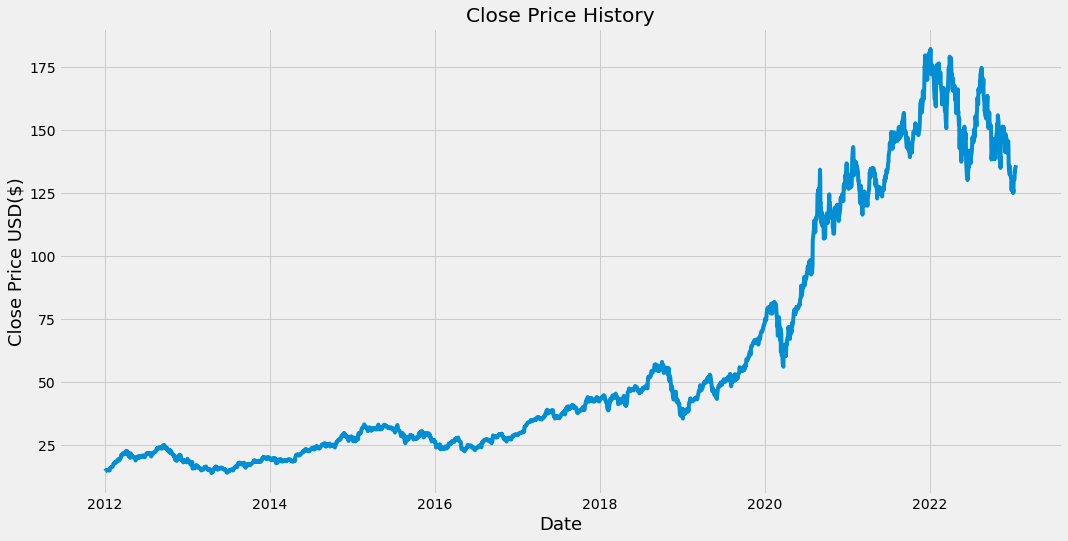

In [103]:
#Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)

In [104]:
#Create a new dataframe with only the 'Close column'

data=df.filter(['Close'])

#Convert the dataframe to a numpy array 
dataset=data.values

#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

2223

In [105]:
# Scale the data 
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00439888],
       [0.00486851],
       [0.00584392],
       ...,
       [0.71082191],
       [0.71885458],
       [0.72587582]])

In [69]:
# Create the training data set 
#Create the scaled training data set
train_data= scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data sets 
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()





[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149657, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527334,
       0.0227679 , 0.02373267, 0.02371355, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873718, 0.03078787, 0.03228178,
       0.03271316, 0.03286405, 0.03030974, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144717, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825799])]
[0.04660893556292853]

[array([0.00439888, 0.00486851, 0.00584392, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655794, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [106]:
# Convert the x_train and y_train to numpy arrays

x_train, y_train= np.array(x_train), np.array(y_train)


In [107]:
#Reshape the data 
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2163, 60, 1)

In [108]:
#Build the LSTM mode
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [109]:
#Compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')


In [110]:
#Train the model 
model.fit(x_train,y_train,batch_size=1,epochs=1)

2163/2163 [==============================] - 64s 28ms/step - loss: 7.0833e-04


In [111]:
#Create the testing data set 
#Create a new array containing scaled values from index 2164 to 2624

test_data=scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test 
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

   


In [112]:
#Convert the data to a numpy array 
x_test=np.array(x_test)


In [113]:
#Reshape the data 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [114]:
#Get the model's predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 18ms/step


In [115]:
#Get the root mean squared error (RMSE)
rmse= np.sqrt(np.mean(predictions-y_test)**2)
rmse

6.231282017088085

In [116]:
#Lower rmse value predicts that the model is a good fit 

<ipython-input-117-98e0b516a588>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


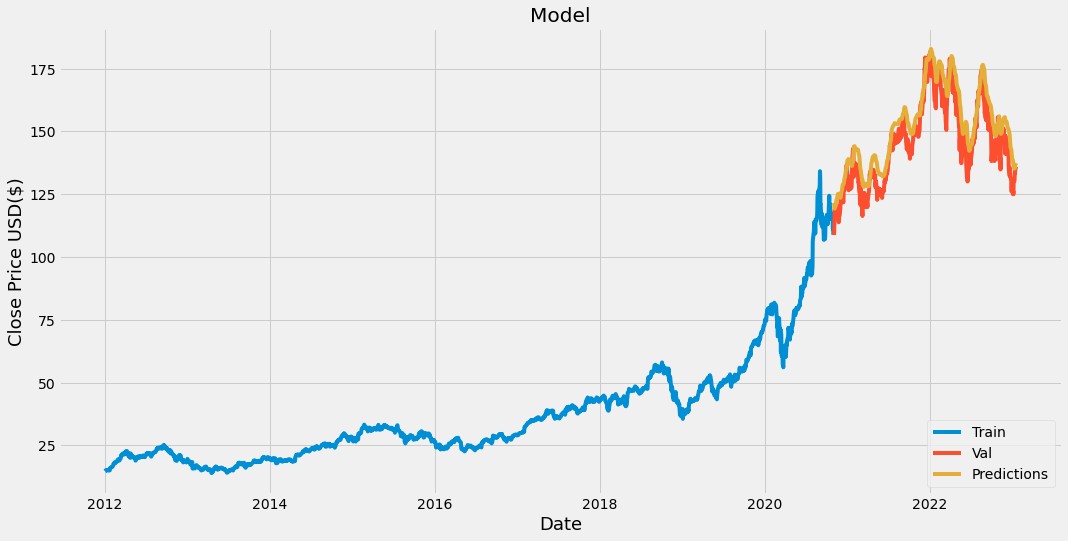

In [117]:
#Plot the data 
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#Visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [118]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-11-02,108.769997,121.514290
2020-11-03,110.440002,120.510086
2020-11-04,114.949997,119.643951
2020-11-05,119.029999,119.312218
2020-11-06,118.690002,119.658752
...,...,...
2023-01-10,130.729996,135.231934
2023-01-11,133.490005,135.399155
2023-01-12,133.410004,135.927307


In [119]:
# Get the quote 
apple_quote=YahooData.fetch("AAPL", start="2012-01-01", end="2023-01-18")

#Create a new dataframe 
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array 
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1 
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list 
X_test=[]
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array 
X_test=np.array(X_test)
#Reshape the data 
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price 
pred_price=model.predict(X_test)
#undo the scaling 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 25ms/step
[[138.34055]]


In [120]:
#Get the quote 
apple_quote2=YahooData.fetch("AAPL", start="2023-01-18", end="2023-01-18")
